In [3]:
import sys
import numpy as np
from scipy.stats import randint
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel

from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping

import itertools



In [5]:
df = pd.read_csv("/Users/artemgolubnichiy/Library/Mobile Documents/com~apple~CloudDocs/АИС 1 курс Спец по Big Data/household_power_consumption.txt", sep=";", parse_dates={"dt":["Date", "Time"]}, infer_datetime_format=True, low_memory=False, na_values=["nan", "?"], index_col="dt")

In [6]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [9]:
df.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [10]:
df.shape

(2075259, 7)

In [11]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [12]:
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [13]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [14]:
droping_all_list = []
for j in range(0, 7):
    if not df.iloc[:, j].notnull().all():
        droping_all_list.append(j)
droping_all_list

[0, 1, 2, 3, 4, 5, 6]

In [15]:
for j in range(0,7):
    df.iloc[:, j] = df.iloc[:, j].fillna(df.iloc[:, j].mean())

In [16]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

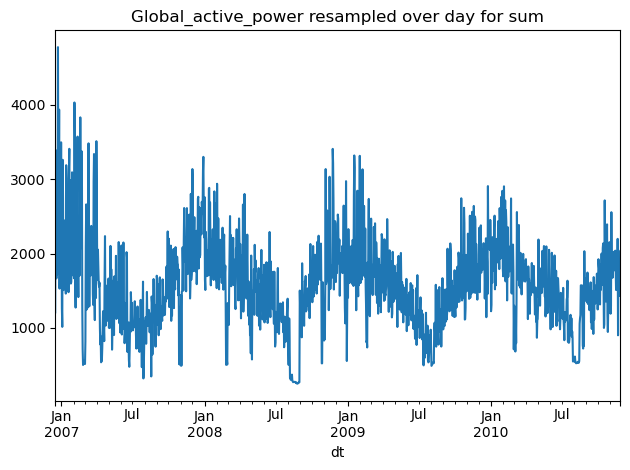

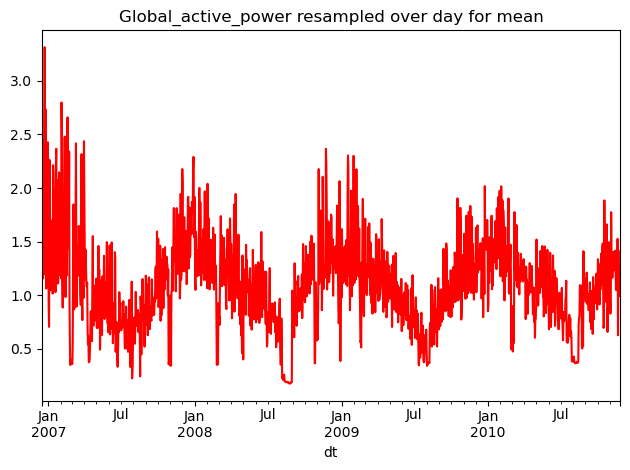

In [18]:
df.Global_active_power.resample("D").sum().plot(title = "Global_active_power resampled over day for sum")
plt.tight_layout()
plt.show()

df.Global_active_power.resample("D").mean().plot(title = "Global_active_power resampled over day for mean", color = "red")
plt.tight_layout()
plt.show()

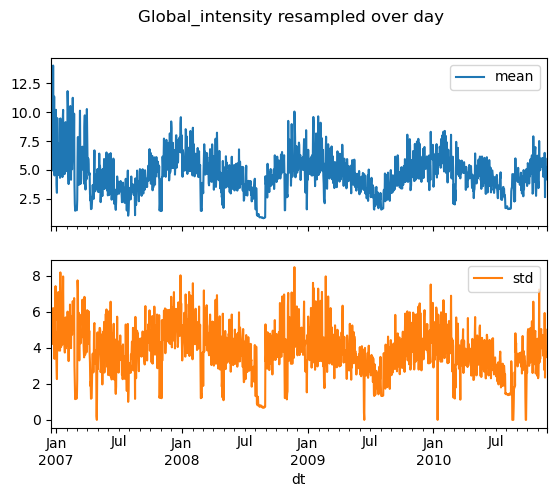

In [19]:
r = df.Global_intensity.resample("D").agg(["mean", "std"])
r.plot(subplots=True, title = "Global_intensity resampled over day")
plt.show()

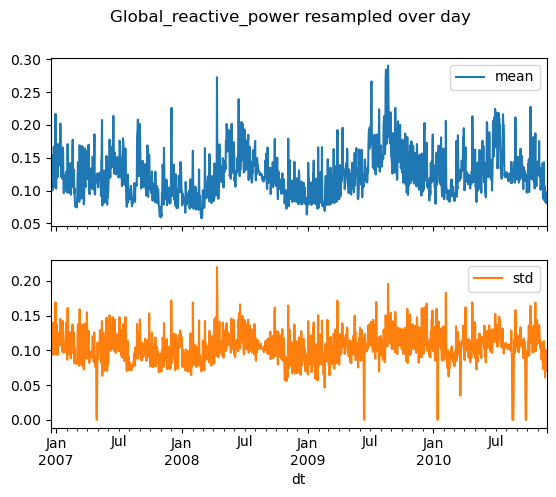

In [20]:
r = df.Global_reactive_power.resample("D").agg(["mean", "std"])
r.plot(subplots=True, title = "Global_reactive_power resampled over day")
plt.show()

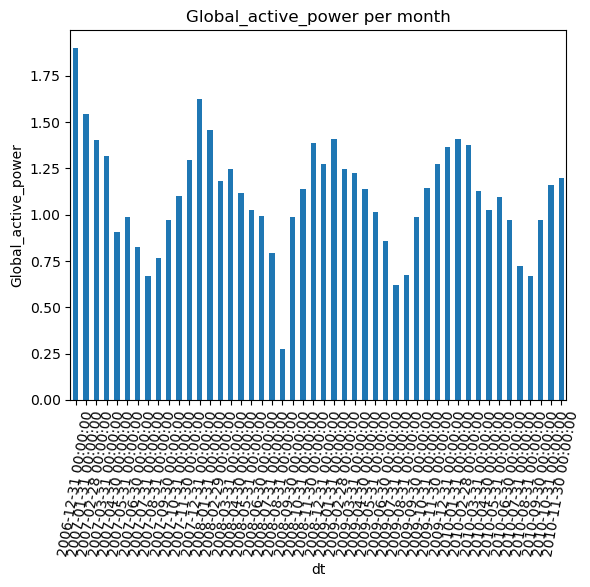

In [23]:
df.Global_active_power.resample("M").mean().plot(kind="bar")
plt.xticks(rotation=80)
plt.ylabel("Global_active_power")
plt.title("Global_active_power per month")
plt.show()

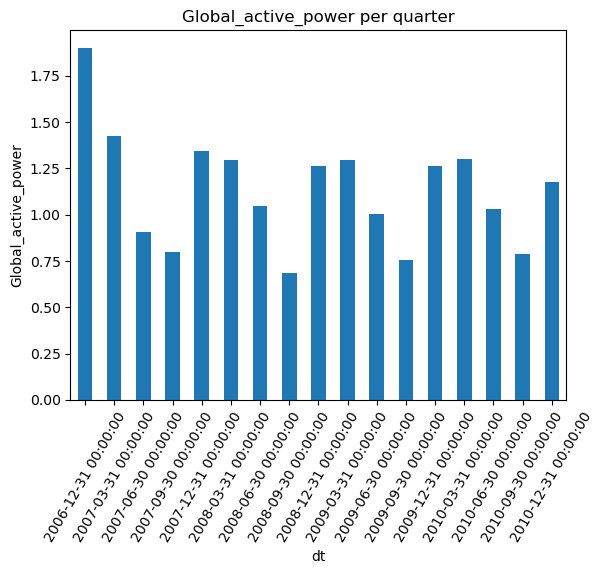

In [24]:
df.Global_active_power.resample("Q").mean().plot(kind="bar")
plt.xticks(rotation=60)
plt.ylabel("Global_active_power")
plt.title("Global_active_power per quarter")
plt.show()

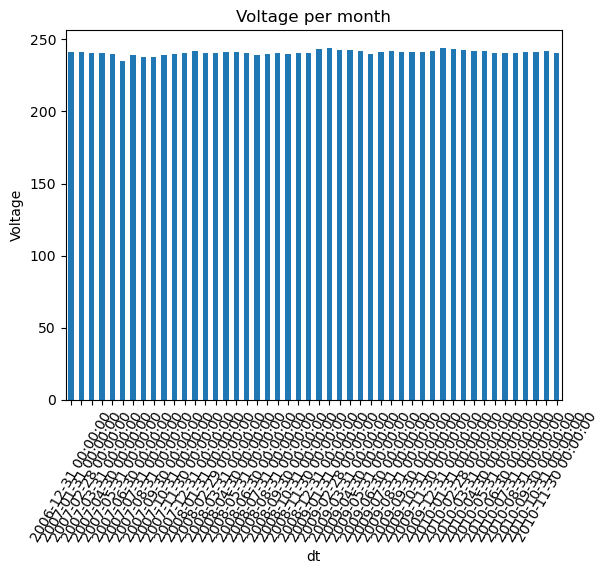

In [25]:
df.Voltage.resample("M").mean().plot(kind="bar")
plt.xticks(rotation=60)
plt.ylabel("Voltage")
plt.title("Voltage per month")
plt.show()

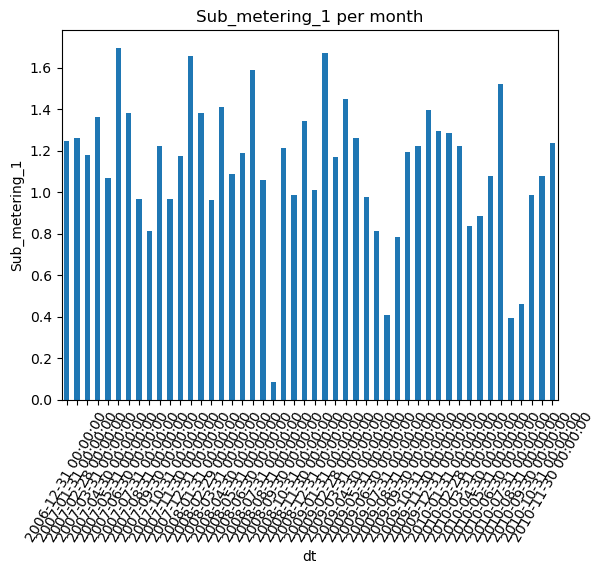

In [26]:
df.Sub_metering_1.resample("M").mean().plot(kind="bar")
plt.xticks(rotation=60)
plt.ylabel("Sub_metering_1")
plt.title("Sub_metering_1 per month")
plt.show()

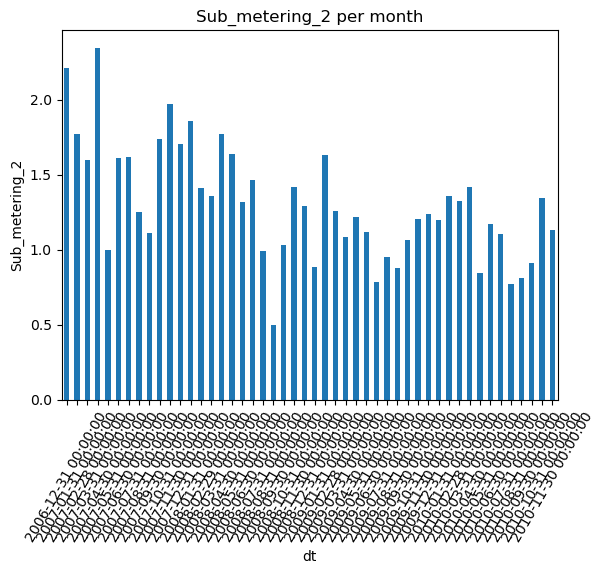

In [27]:
df.Sub_metering_2.resample("M").mean().plot(kind="bar")
plt.xticks(rotation=60)
plt.ylabel("Sub_metering_2")
plt.title("Sub_metering_2 per month")
plt.show()

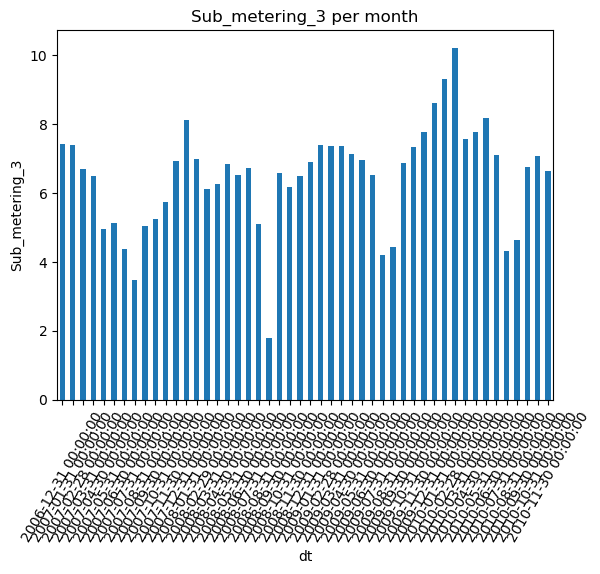

In [28]:
df.Sub_metering_3.resample("M").mean().plot(kind="bar")
plt.xticks(rotation=60)
plt.ylabel("Sub_metering_3")
plt.title("Sub_metering_3 per month")
plt.show()

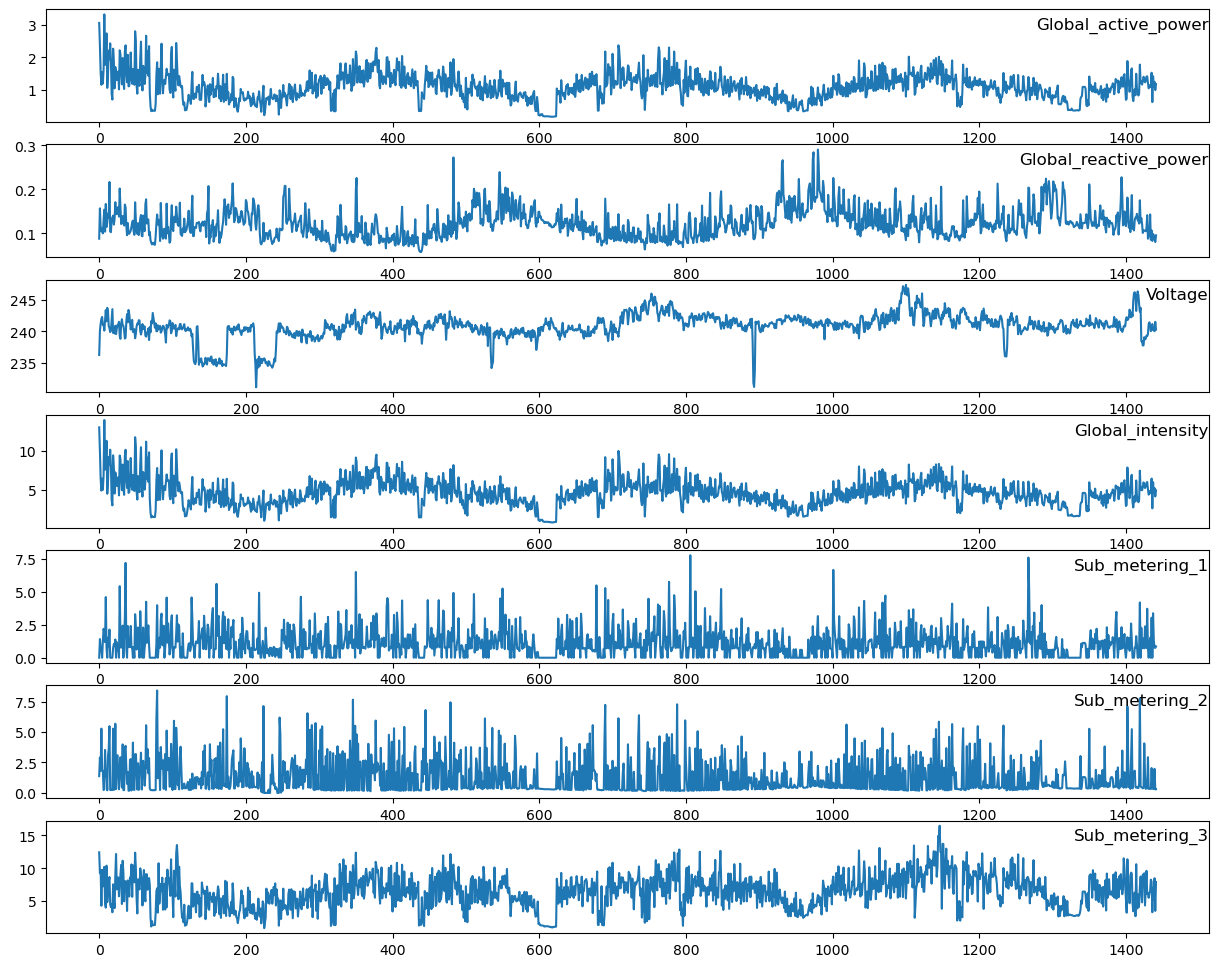

In [29]:
cols = [0,1,2,3,4,5,6]
i = 1
groups = cols
values = df.resample("D").mean().values
plt.figure(figsize=(15,12))
for group in groups:
    plt.subplot(len(cols), 1, i)
    plt.plot(values[:, group])
    plt.title(df.columns[group], y=0.75, loc="right")
    i+=1
plt.show()

In [34]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [35]:
df_resample = df.resample("h").mean()
df_resample.shape

(34589, 7)

In [36]:
values = df_resample.values

scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)

reframed = series_to_supervised(scaled, 1, 1)

reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.636816   0.295738   0.337945   0.631157        0.0   0.011366   
2   0.545045   0.103358   0.335501   0.541487        0.0   0.144652   
3   0.509006   0.110073   0.283802   0.502152        0.0   0.030869   
4   0.488550   0.096987   0.315987   0.481110        0.0   0.000000   
5   0.455597   0.099010   0.434417   0.449904        0.0   0.008973   

   var7(t-1)   var1(t)  
1   0.782418  0.545045  
2   0.782676  0.509006  
3   0.774169  0.488550  
4   0.778809  0.455597  
5   0.798917  0.322555  


In [37]:
values = reframed.values

n_train_time = 365*24
train = values[:n_train_time, :]
test = values[n_train_time:, :]

train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 


(8760, 1, 7) (8760,) (25828, 1, 7) (25828,)


Epoch 1/20
126/126 - 1s - loss: 0.0200 - val_loss: 0.0114 - 1s/epoch - 9ms/step
Epoch 2/20
126/126 - 0s - loss: 0.0136 - val_loss: 0.0107 - 248ms/epoch - 2ms/step
Epoch 3/20
126/126 - 0s - loss: 0.0125 - val_loss: 0.0101 - 226ms/epoch - 2ms/step
Epoch 4/20
126/126 - 0s - loss: 0.0115 - val_loss: 0.0096 - 224ms/epoch - 2ms/step
Epoch 5/20
126/126 - 0s - loss: 0.0113 - val_loss: 0.0093 - 219ms/epoch - 2ms/step
Epoch 6/20
126/126 - 0s - loss: 0.0110 - val_loss: 0.0092 - 218ms/epoch - 2ms/step
Epoch 7/20
126/126 - 0s - loss: 0.0107 - val_loss: 0.0090 - 219ms/epoch - 2ms/step
Epoch 8/20
126/126 - 0s - loss: 0.0108 - val_loss: 0.0090 - 216ms/epoch - 2ms/step
Epoch 9/20
126/126 - 0s - loss: 0.0107 - val_loss: 0.0090 - 281ms/epoch - 2ms/step
Epoch 10/20
126/126 - 0s - loss: 0.0107 - val_loss: 0.0090 - 222ms/epoch - 2ms/step
Epoch 11/20
126/126 - 0s - loss: 0.0107 - val_loss: 0.0090 - 220ms/epoch - 2ms/step
Epoch 12/20
126/126 - 0s - loss: 0.0107 - val_loss: 0.0090 - 222ms/epoch - 2ms/step
Epoc

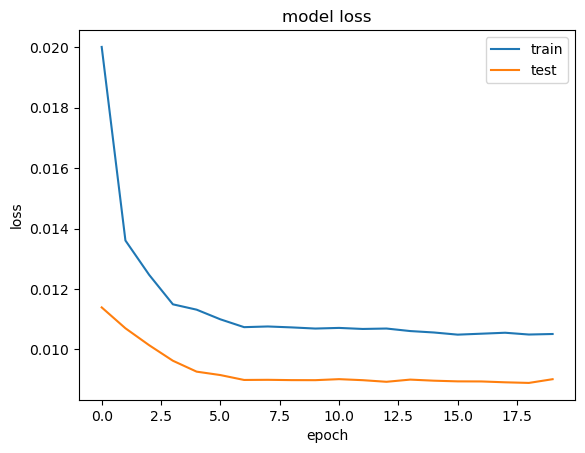

In [43]:
model = Sequential()
model.add(LSTM(25, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))

model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")

history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


In [42]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100)               43200     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 43301 (169.14 KB)
Trainable params: 43301 (169.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 7))

inv_yhat = np.concatenate((yhat, test_X[:, -6:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -6:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

808/808 [==============================] - 0s 368us/step
Test RMSE: 0.611


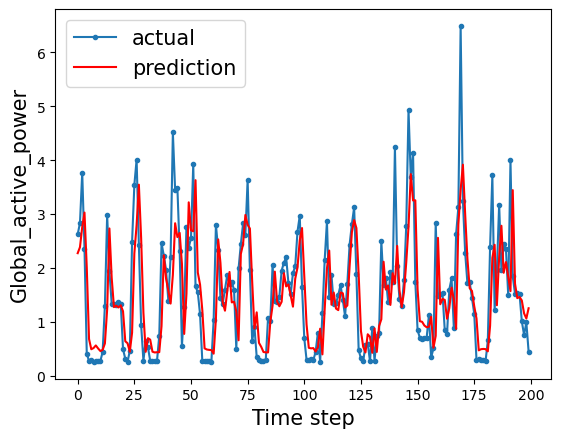

In [45]:
aa=[x for x in range(200)]
plt.plot(aa, inv_y[:200], marker='.', label="actual")
plt.plot(aa, inv_yhat[:200], 'r', label="prediction")
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

ValueError: x and y must have same first dimension, but have shapes (400,) and (200,)

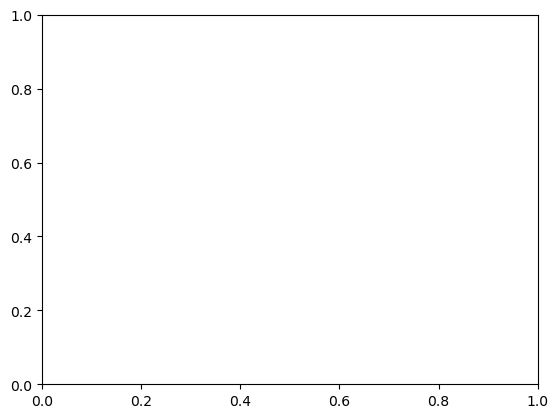

In [46]:
aa=[x for x in range(400)]
plt.plot(aa, inv_y[:200], marker='.', label="actual")
plt.plot(aa, inv_yhat[:400], 'r', label="prediction")
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()